In [ ]:
# SUPPORT VECTOR MACHINE Assignment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to read just one sheet to dataframe:
df = pd.read_csv('/content/mushroom.csv')
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
df.shape

(2000, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
# summary statistics
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [ ]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


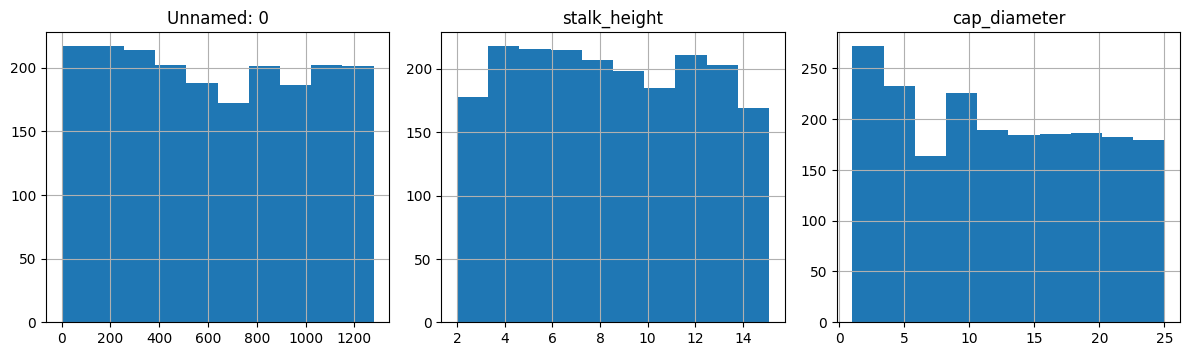

In [ ]:
# Select numerical columns from heart disease DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as per your number of numerical columns
    df[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

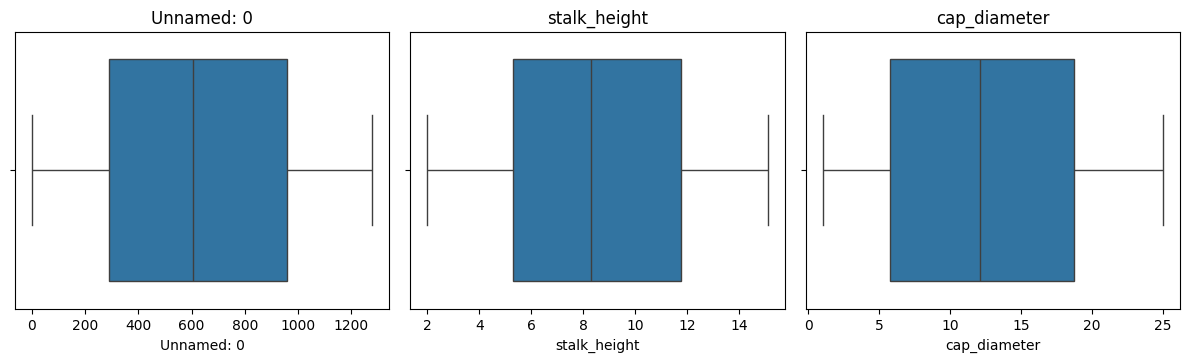

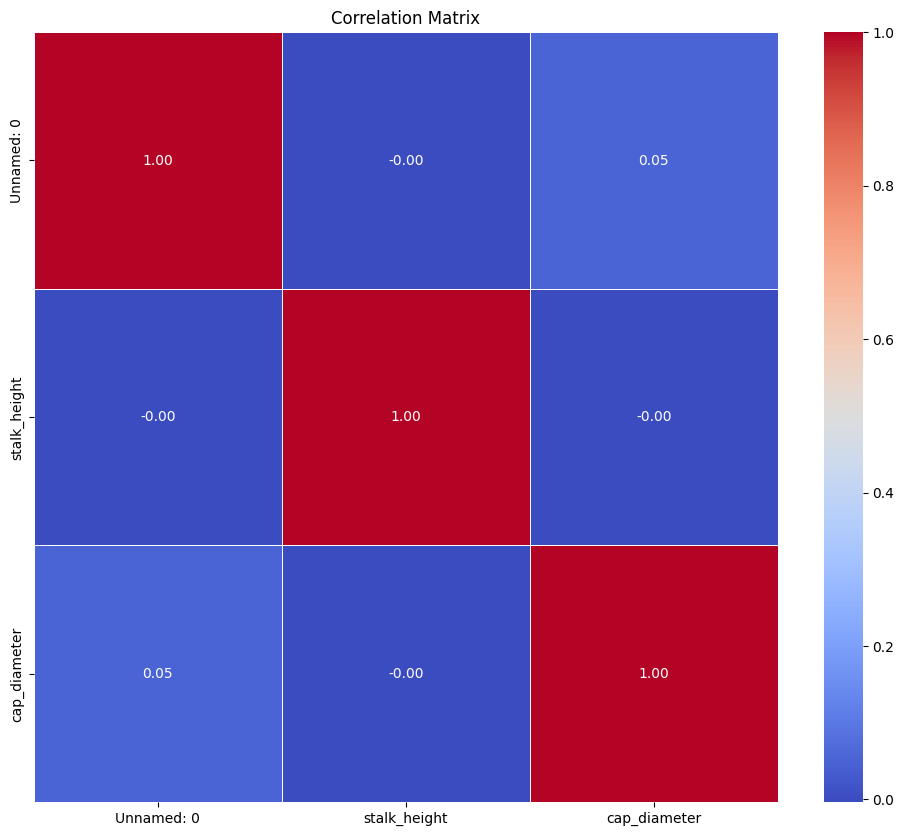

In [ ]:
# Plot box plots for numerical columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout as per your number of numerical columns
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example checking for inconsistencies value counts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())

Column: cap_shape
cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64
Column: cap_surface
cap_surface
scaly      568
smooth     513
fibrous    482
grooves    437
Name: count, dtype: int64
Column: cap_color
cap_color
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: count, dtype: int64
Column: bruises
bruises
yes    1023
no      977
Name: count, dtype: int64
Column: odor
odor
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: count, dtype: int64
Column: gill_attachment
gill_attachment
free          540
notched       535
attached      487
descending    438
Name: count, dtype: int64
Column: gill_spacing
gill_spacing
distant    677
close      664
crowded    659
Name: count, dtype: int64
Column: gill_size
gill_size
narrow    1007
broad      993
Name: coun

In [ ]:
# Encoding categorical variable
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming df is your dataframe with categorical columns
# Perform one-hot encoding for categorical variables with less than 5 categories
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
     if len(df[col].unique()) >= 5:
        print("hi",df[col].unique())
        df = pd.get_dummies(df, columns=[col])

df.columns

hi ['sunken' 'flat' 'bell' 'convex' 'conical']
hi ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
hi ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
hi ['pink' 'chocolate' 'purple' 'orange' 'buff' 'black' 'red' 'green' 'brown'
 'yellow' 'white' 'gray']
hi ['cup' 'rooted' 'club' 'missing' 'equal' 'bulbous' 'rhizomorphs']
hi ['gray' 'cinnamon' 'yellow' 'white' 'red' 'buff' 'orange' 'brown' 'pink']
hi ['yellow' 'brown' 'gray' 'pink' 'white' 'red' 'orange' 'buff' 'cinnamon']
hi ['sheathing' 'cobwebby' 'none' 'flaring' 'large' 'evanescent' 'zone'
 'pendant']
hi ['chocolate' 'brown' 'purple' 'green' 'yellow' 'white' 'orange' 'black'
 'buff']
hi ['clustered' 'numerous' 'abundant' 'scattered' 'several' 'solitary']
hi ['waste' 'grasses' 'urban' 'woods' 'leaves' 'paths' 'meadows']


Index(['Unnamed: 0', 'cap_surface', 'bruises', 'gill_attachment',
       'gill_spacing', 'gill_size', 'stalk_shape', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'veil_type',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=105)

In [ ]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target variable (y)
X = df.drop('cap_diameter', axis=1)  # Adjust 'Target_variable' based on your dataset
y = df['cap_diameter']
df.columns

Index(['Unnamed: 0', 'cap_surface', 'bruises', 'gill_attachment',
       'gill_spacing', 'gill_size', 'stalk_shape', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'veil_type',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=105)

In [ ]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

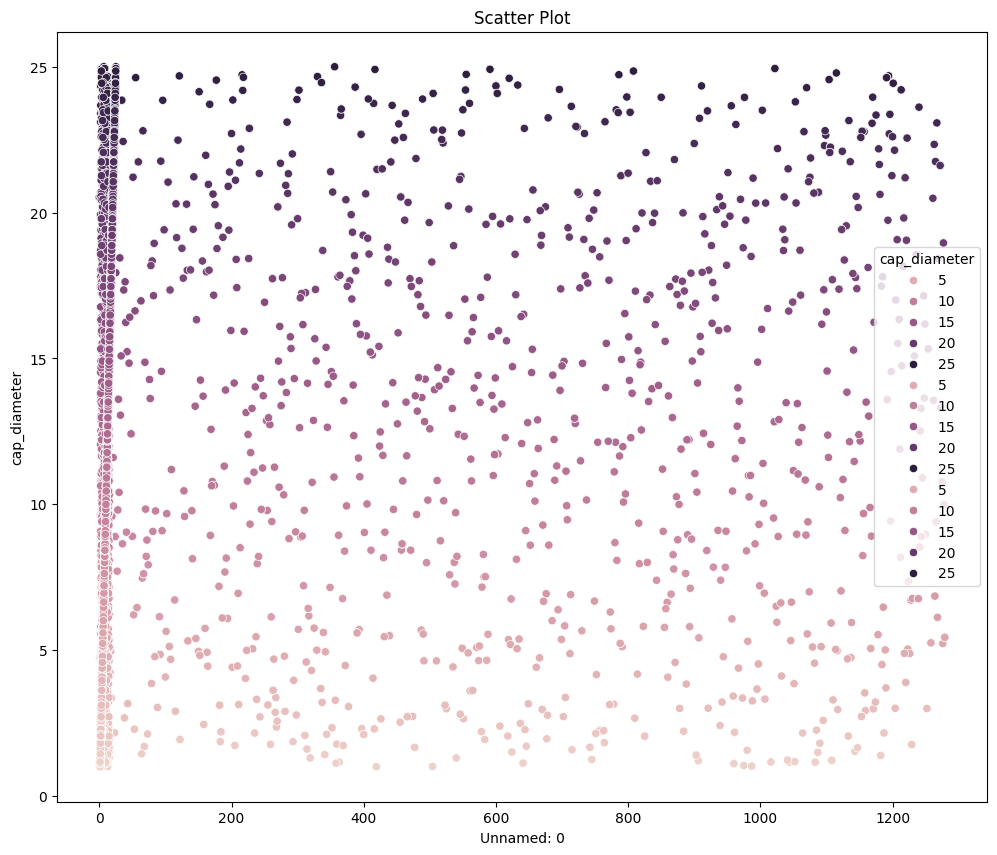

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
   sns.scatterplot(x=df[col], y='cap_diameter', data=df, hue='cap_diameter')
plt.title('Scatter Plot')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset (replace 'dataset.csv' with your dataset)
df = pd.read_csv('/content/mushroom.csv')

# Example: Encoding categorical variables using LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

    # Ensure 'Target_variable' is in a suitable format for classification
# Example: Convert continuous 'Target_variable' to categorical labels
bins = [-float('inf'), 0, float('inf')]  # Define bins for classification
labels = [0, 1]  # Example labels for classification

df['cap_diameter'] = pd.cut(df['cap_diameter'], bins=bins, labels=labels)


# Separate features (X) and target variable (y)
X = df.drop('cap_diameter', axis=1)  # Adjust 'Target_variable' based on your dataset
y = df['cap_diameter']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes to ensure correct splitting
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1600, 25), y_train shape: (1600,)
X_test shape: (400, 25), y_test shape: (400,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load dataset (replace 'dataset.csv' with your dataset)
df = pd.read_csv('/content/mushroom.csv')
df.info()
# Separate features (X) and target variable (y)
X = df.drop('Unnamed: 0', axis=1)  # Adjust 'Target_variable' based on your dataset
y = df['Unnamed: 0']


# Encode categorical variables using LabelEncoder
le = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = le.fit_transform(X_encoded[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
svm_pred = svm_model.predict(X_test)

# Evaluate model performance with appropriate average setting
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')  # Use 'weighted' for multiclass
svm_recall = recall_score(y_test, svm_pred, average='weighted')  # Use 'weighted' for multiclass
svm_f1 = f1_score(y_test, svm_pred, average='weighted')  # Use 'weighted' for multiclass


# Print evaluation metrics
print("SVM Model Performance:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1:.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


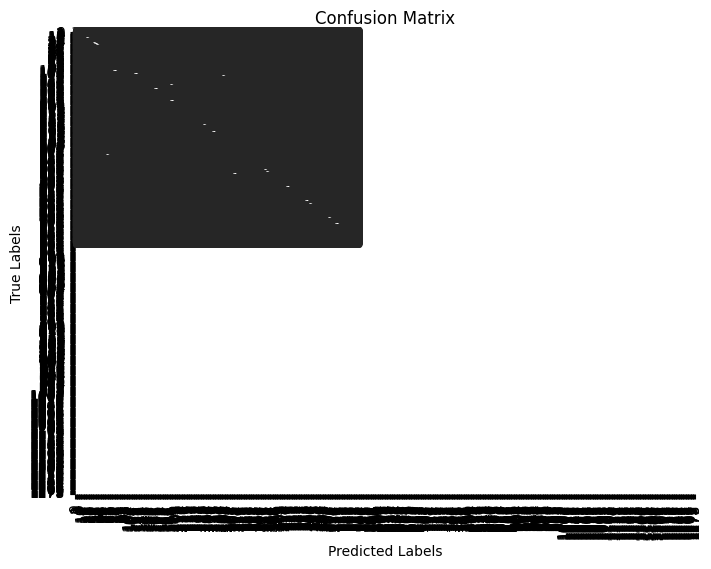

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming svm_model is already trained and X_test, y_test are available from previous steps

# Predict on the testing data
svm_pred = svm_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

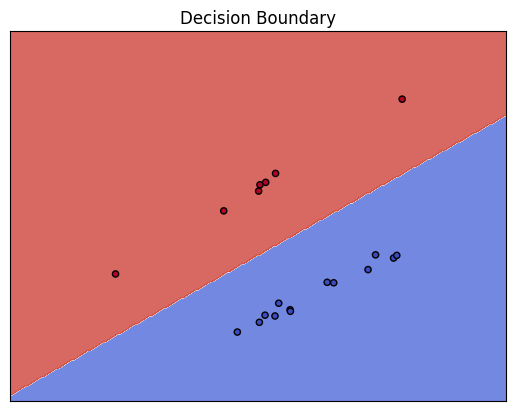

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic data for illustration purposes
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model (assuming tuned parameters)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Define a function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #plt.xlabel('Feature 1')
    #plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary with testing data
plot_decision_boundary(svm_model, X_test, y_test)

<ipython-input-17-e62c5fac8fa2>:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_pred, marker='x', cmap=plt.cm.coolwarm, s=100, edgecolors='k', label='Predicted')


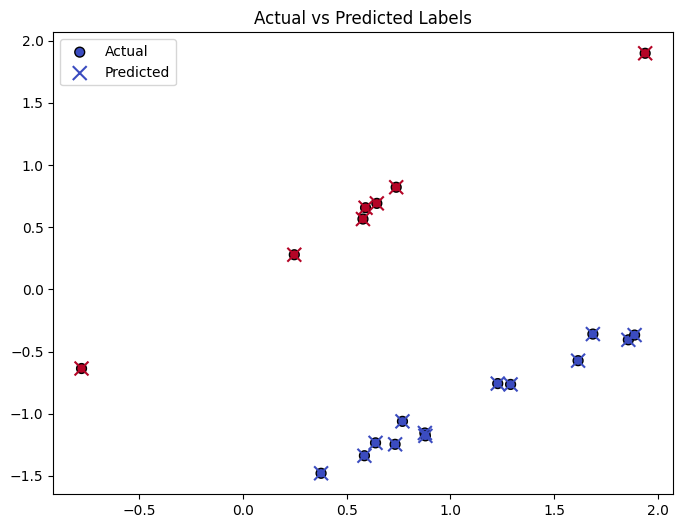

In [ ]:
# Predict on the testing data
svm_pred = svm_model.predict(X_test)

# Plot actual vs predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=50, edgecolors='k', label='Actual')
plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_pred, marker='x', cmap=plt.cm.coolwarm, s=100, edgecolors='k', label='Predicted')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()

# **Multiclass Classification**
For multiclass classification, visualizing the results can involve plotting decision boundaries (for two-dimensional data) or using other techniques to visualize the distribution of predicted labels.

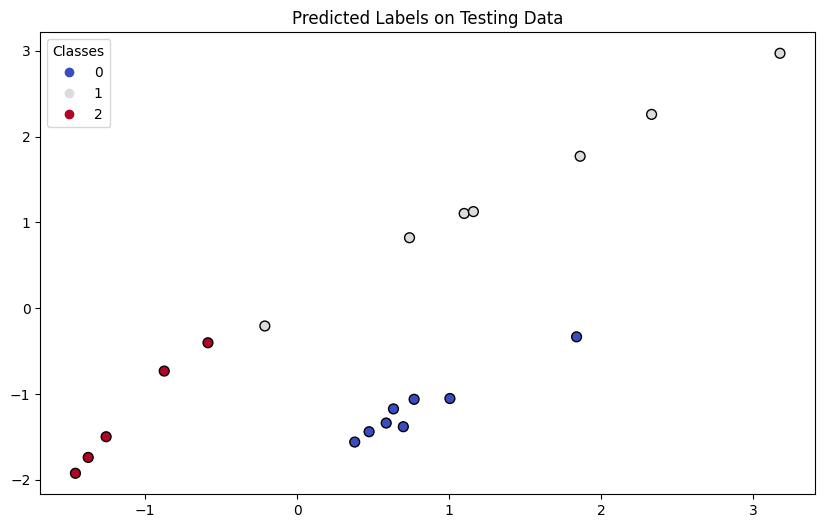

In [ ]:
# Multiclass Classification
# Assuming X_test and svm_pred are defined from earlier steps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Generate synthetic data for illustration purposes
X, y = make_classification(n_samples=100, n_features=2, n_classes=3,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model (assuming tuned parameters)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Predict on the testing data
svm_pred = svm_model.predict(X_test)

# Plot predicted labels with legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_pred, cmap='coolwarm', s=50, edgecolors='k')
handles, labels = scatter.legend_elements()
plt.legend(handles, np.unique(svm_pred), title='Classes')
plt.title('Predicted Labels on Testing Data')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.show()

# **Grid Search for Parameter Tuning**

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the Mushroom dataset

mushroom_data = pd.read_csv('/content/mushroom.csv')

# Encode categorical variables using LabelEncoder
labelencoder = LabelEncoder()
for column in mushroom_data.columns:
    mushroom_data[column] = labelencoder.fit_transform(mushroom_data[column])

# Separate features and target variable
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define SVM classifier
svm_model = SVC()

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': [ 'rbf'],  # Kernel type
    # 'kernel': ['linear', 'poly', 'rbf']
    'gamma': ['scale', 'auto']        # Kernel coefficient ('scale' uses 1 / (n_features * X.var()) as gamma)
}


In [2]:

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(),param_grid, verbose=4, refit=True,cv=3)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.708 total time=   0.2s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.707 total time=   0.2s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.709 total time=   0.1s
[CV 1/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.708 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.707 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.709 total time=   0.2s
[CV 1/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.708 total time=   0.3s
[CV 2/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.707 total time=   0.2s
[CV 3/3] END ......C=1, gamma=scale, kernel=rbf;, score=0.709 total time=   0.2s
[CV 1/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.846 total time=   0.3s
[CV 2/3] END .......C=1, gamma=auto, kernel=rbf;, score=0.826 total time=   0.3s
[CV 3/3] END .......C=1, gamma=auto, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']},
             verbose=4)

In [3]:
# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate model performance on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set accuracy with best model: {:.2f}".format(test_score))

Best parameters found:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.84
Test set accuracy with best model: 0.89


**Support Vector Machines (SVMs)** are versatile classifiers that can perform well with different kernels depending on the problem at hand. The choice of kernel can significantly influence the performance of an SVM model.

a. **Linear Kernel**:

Performance: The linear kernel is used when the data is linearly separable. It constructs a hyperplane in the feature space that separates the classes. It’s computationally efficient and works well for high-dimensional data, especially when the number of features is much larger than the number of samples.

Pros: Simplicity, less computationally intensive.

Cons: Might not capture complex relationships if the data is not linearly separable.
b. **Polynomial Kernel**:

Performance: The polynomial kernel can capture interactions between features up to a certain degree. It creates a decision boundary that is a polynomial function of the input features. This kernel is useful when you need to model more complex relationships.
Pros: Can handle more complex data patterns and relationships.
Cons: The choice of polynomial degree can be tricky and may lead to overfitting if the degree is too high. Also, it becomes computationally expensive with higher degrees.

c. **Radial Basis Function (RBF) Kernel**:

Performance: The RBF kernel, also known as the Gaussian kernel, maps data into an infinite-dimensional space, allowing for very flexible decision boundaries. It works well for datasets where the decision boundary is highly non-linear.
Pros: Highly flexible and can handle a wide range of data distributions. It does not require the data to be linearly separable.
Cons: Requires careful tuning of the gamma parameter and can be computationally intensive. It may also overfit if gamma is too high.
Comparative Summary:

Linear Kernel: Best for linearly separable data, computationally efficient.
Polynomial Kernel: Good for capturing polynomial relationships, but requires careful tuning of the degree.
RBF Kernel: Highly flexible, suitable for complex datasets, but computationally demanding and sensitive to parameter settings.

2. Analyzing SVM Strengths and Weaknesses for the Mushroom Dataset
Mushroom Dataset Overview:
The Mushroom dataset is often used in classification problems, with features describing various characteristics of mushrooms, and the task is to classify them as edible or poisonous.

Strengths of SVM for Mushroom Dataset:

Clear Decision Boundaries: SVM can find clear decision boundaries even in complex feature spaces, which is useful given the diverse characteristics of mushrooms.
Effective in High Dimensions: If the dataset has numerous features (e.g., encoded categorical features), SVM can handle high-dimensional spaces effectively.

Robustness to Overfitting: By choosing appropriate kernel and regularization parameters, SVMs can be tuned to avoid overfitting, especially if the dataset is not too large.

Weaknesses of SVM for Mushroom Dataset:

Computational Complexity: SVMs can be slow to train on large datasets or with complex kernels, which might be an issue if the mushroom dataset is large.

Parameter Tuning: Finding the optimal kernel and regularization parameters requires cross-validation and can be computationally expensive.

Interpretability: SVM models, especially with non-linear kernels, can be harder to interpret compared to simpler models like decision trees, which might make it challenging to understand the decision boundaries in the context of the dataset.
3. Practical Implications of SVM in Real-World Classification Tasks
a. Versatility Across Domains:
SVMs are versatile and can be applied to various domains, including image recognition, text classification, and bioinformatics. Their ability to handle high-dimensional data and non-linear relationships makes them suitable for complex classification tasks.

b. Practical Challenges:

Scalability: For very large datasets, SVMs can become computationally expensive. Alternatives like stochastic gradient descent-based methods or other scalable classifiers might be preferred.
Parameter Tuning: Selecting the appropriate kernel and tuning hyperparameters (like C and gamma for RBF kernels) is crucial and often requires domain knowledge and experimentation.
Model Interpretability: In practical applications, understanding how the model makes decisions is important for trust and validation. SVMs with complex kernels might not offer the same level of interpretability as simpler models.

c. Real-World Applications:

Medical Diagnosis: SVMs can be used to classify medical images or patient data, such as distinguishing between different types of tumors.
Financial Sector: SVMs are used for fraud detection, credit scoring, and market prediction, leveraging their ability to classify complex patterns.
Text Classification: SVMs are effective in classifying text documents, spam filtering, and sentiment analysis due to their good performance with high-dimensional data.